In this notebook, our task is to predict the price of cars given a set of attributes.

In [1]:
import pandas as pd
import numpy as np

# Importing the Data

In [2]:
path = 'D:/Study/McGill University - MMA/Courses/INSY 695/Data/AutomobileData/'
df = pd.read_csv(path+'Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [5]:
df.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

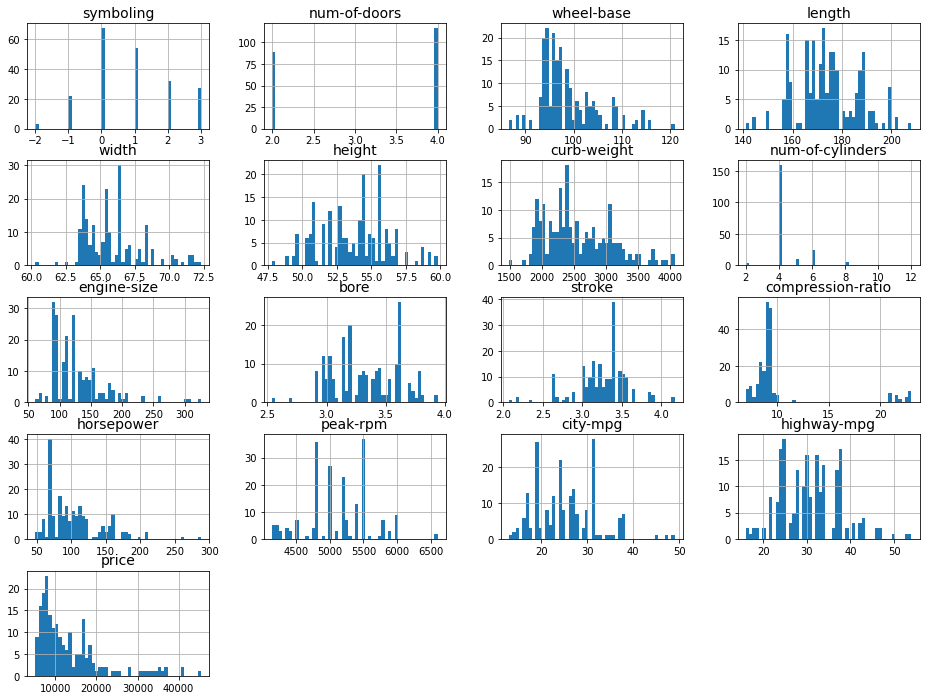

In [7]:
import matplotlib.pyplot as plt

# setting the font size
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(16, 12))
plt.show()

In [8]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [9]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [10]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [11]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

# Visualizing the Data

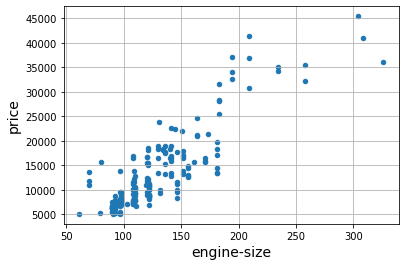

In [12]:
df.plot(kind="scatter", x="engine-size", y="price", grid=True)
plt.show()

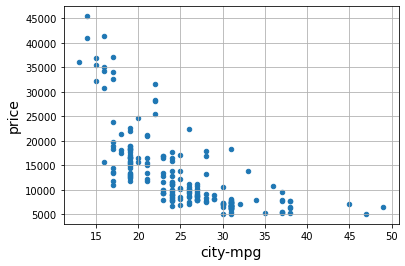

In [13]:
df.plot(kind="scatter", x="city-mpg", y="price", grid=True)
plt.show()

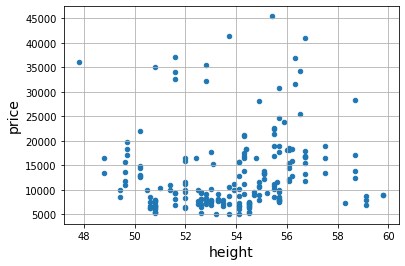

In [14]:
df.plot(kind="scatter", x="height", y="price", grid=True)
plt.show()

<AxesSubplot:xlabel='body-style', ylabel='price'>

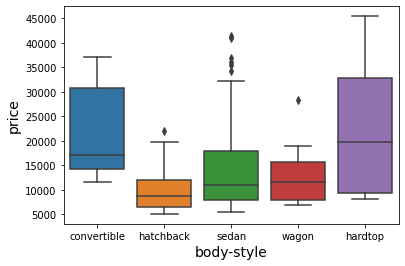

In [15]:
import seaborn as sns

sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

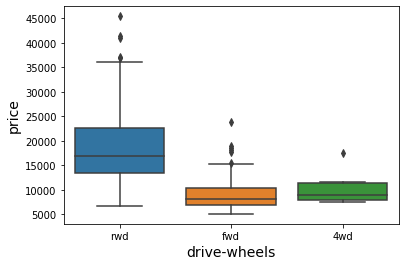

In [16]:
sns.boxplot(x='drive-wheels', y='price', data=df)

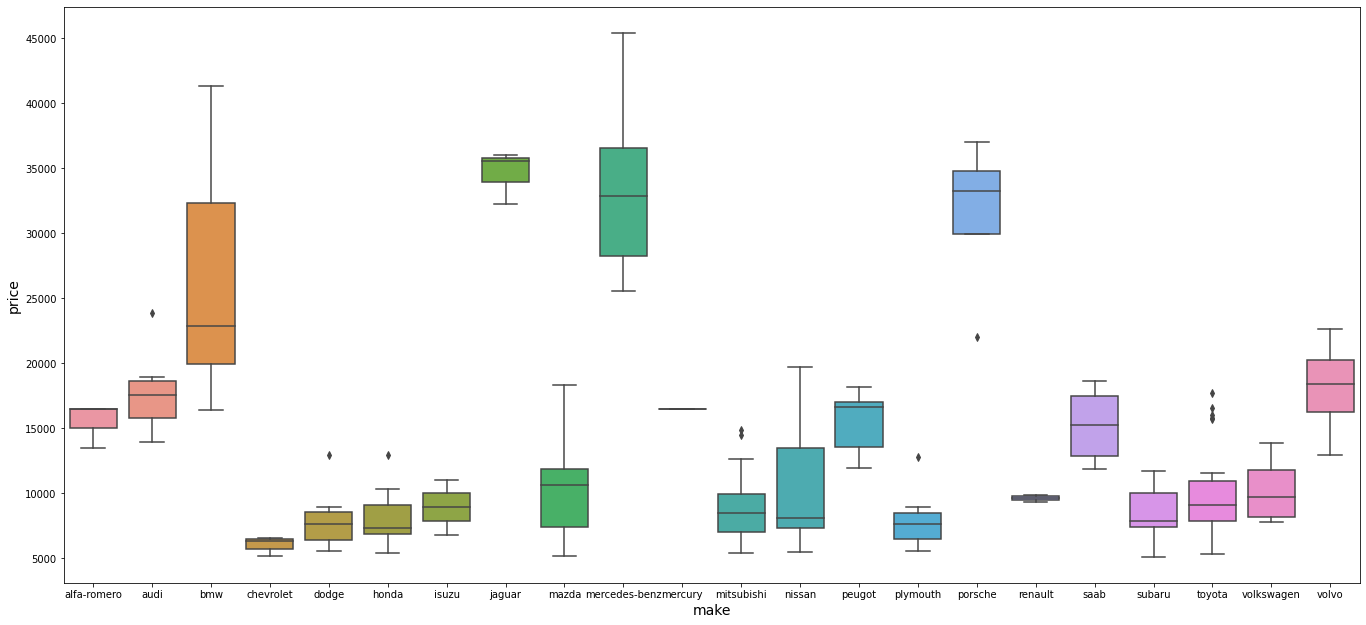

In [17]:
fig = plt.figure(figsize =(18, 8))
axes = fig.add_axes([0, 0, 1, 1])
plot = sns.boxplot(x='make', y='price', data=df)
plt.show()

# Checking Correlations among Variables

In [18]:
corr_matrix = df.corr()

In [19]:
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
num-of-cylinders     0.708645
length               0.690628
wheel-base           0.584642
bore                 0.543436
height               0.135486
stroke               0.082310
compression-ratio    0.071107
num-of-doors         0.042435
symboling           -0.082391
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

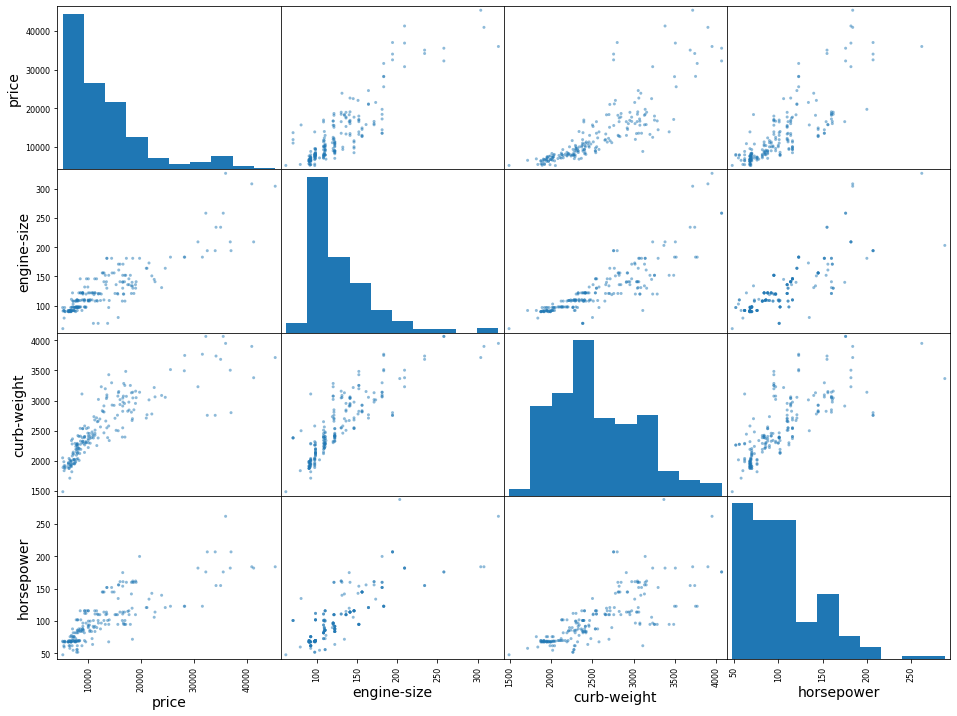

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["price", "engine-size", "curb-weight", "horsepower"]
scatter_matrix(df[attributes], figsize=(16, 12))
plt.show()

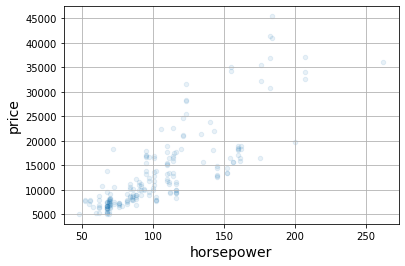

In [21]:
df.plot(kind="scatter", x="horsepower", y="price", alpha=0.1, grid=True)
plt.show()

# Experimenting with Attribute Combinations

In [22]:
df['horsepower-per-engine-capacity'] = df['horsepower'] / df['engine-size']
df['horsepower-per-weight'] = df['horsepower'] / df['curb-weight']
df['price-per-horsepower'] = df['price'] / df['horsepower']

In [23]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
engine-size                       0.872335
curb-weight                       0.834415
horsepower                        0.810533
price-per-horsepower              0.786900
width                             0.751265
num-of-cylinders                  0.708645
length                            0.690628
wheel-base                        0.584642
bore                              0.543436
horsepower-per-weight             0.513626
height                            0.135486
horsepower-per-engine-capacity    0.132302
stroke                            0.082310
compression-ratio                 0.071107
num-of-doors                      0.042435
symboling                        -0.082391
peak-rpm                         -0.101649
city-mpg                         -0.686571
highway-mpg                      -0.704692
Name: price, dtype: float64

Therefore, we can use price-per-horsepower, horsepower-per-weight, and horsepower-per-engine-capacity instead of the highly correlated variables (engine-size, curb-weight, and horsepower) to address the collinearity issue.

# Data Cleaning

We will drop irrelevant columns or columns with lots of missing values. For remaining columns, we will replace NaN values with mean/median for numeric variables and mode for categorical variables.

In [24]:
# Dropping irrelevant columns
final_data = df.drop(['symboling', 'normalized-losses'], axis=1)
final_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114.0,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160.0,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134.0,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


In [25]:
final_data.isnull().sum()

make                              0
fuel-type                         0
aspiration                        0
num-of-doors                      0
body-style                        0
drive-wheels                      0
engine-location                   0
wheel-base                        0
length                            0
width                             0
height                            0
curb-weight                       0
engine-type                       0
num-of-cylinders                  0
engine-size                       0
fuel-system                       0
bore                              4
stroke                            4
compression-ratio                 0
horsepower                        2
peak-rpm                          2
city-mpg                          0
highway-mpg                       0
price                             4
horsepower-per-engine-capacity    2
horsepower-per-weight             2
price-per-horsepower              6
dtype: int64

# Numeric Variables

In [26]:
# Replacing NaN values
median_bore = final_data['bore'].median()
final_data['bore'].fillna(median_bore, inplace = True)

In [27]:
median_stroke = final_data['stroke'].median()
final_data['stroke'].fillna(median_stroke, inplace = True)

In [28]:
median_hp = final_data['horsepower'].median()
final_data['horsepower'].fillna(median_hp, inplace = True)

In [29]:
median_rpm = final_data['peak-rpm'].median()
final_data['peak-rpm'].fillna(median_rpm, inplace = True)

In [30]:
median_price = final_data['price'].median()
final_data['price'].fillna(median_price, inplace = True)

In [31]:
median_hp_per_capacity = final_data['horsepower-per-engine-capacity'].median()
final_data['horsepower-per-engine-capacity'].fillna(median_hp_per_capacity, inplace = True)

In [32]:
median_hp_per_weight = final_data['horsepower-per-weight'].median()
final_data['horsepower-per-weight'].fillna(median_hp_per_weight, inplace = True)

In [33]:
median_price_per_hp = final_data['price-per-horsepower'].median()
final_data['price-per-horsepower'].fillna(median_price_per_hp, inplace = True)

In [34]:
final_data.isnull().sum()

make                              0
fuel-type                         0
aspiration                        0
num-of-doors                      0
body-style                        0
drive-wheels                      0
engine-location                   0
wheel-base                        0
length                            0
width                             0
height                            0
curb-weight                       0
engine-type                       0
num-of-cylinders                  0
engine-size                       0
fuel-system                       0
bore                              0
stroke                            0
compression-ratio                 0
horsepower                        0
peak-rpm                          0
city-mpg                          0
highway-mpg                       0
price                             0
horsepower-per-engine-capacity    0
horsepower-per-weight             0
price-per-horsepower              0
dtype: int64

In [35]:
# Making a copy of the clean data 
data_copy = final_data

In [36]:
# Dropping highly correlated variables
final_data = final_data.drop(['engine-size', 'curb-weight', 'horsepower'], axis=1)
final_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


# Handling Categorical Variables

Since our data does not have missing values for categorical variables, data cleaning is not required. Instead, we should turn them into numeric values to be able to use them in our model.

In [37]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

In [47]:
final_data['make'] = lbl.fit_transform(final_data['make'])

In [49]:
final_data['fuel-type'] = lbl.fit_transform(final_data['fuel-type'])

In [50]:
final_data['aspiration'] = lbl.fit_transform(final_data['aspiration'])

In [51]:
final_data['body-style'] = lbl.fit_transform(final_data['body-style'])

In [52]:
final_data['drive-wheels'] = lbl.fit_transform(final_data['drive-wheels'])

In [53]:
final_data['engine-location'] = lbl.fit_transform(final_data['engine-location'])

In [54]:
final_data['engine-type'] = lbl.fit_transform(final_data['engine-type'])

In [55]:
final_data['fuel-system'] = lbl.fit_transform(final_data['fuel-system'])

In [56]:
final_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.78,3.15,9.5,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,21,1,1,4,3,2,0,109.1,188.8,68.8,...,3.78,3.15,8.7,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.58,2.87,8.8,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,21,0,1,4,3,2,0,109.1,188.8,68.9,...,3.01,3.40,23.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


# Defining the Target and Predictor Variables

In [60]:
# Our target variable is the 'price' attribute, which refers to the price of the car.
y = final_data[['price']]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [61]:
# The remaining attributes are our predictors.
X = final_data.drop(['price'], axis=1)
X

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,5000.0,21,27,0.853846,0.043564,121.576577
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,5000.0,21,27,0.853846,0.043564,148.648649
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,5000.0,19,26,1.013158,0.054552,107.142857
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,5500.0,24,30,0.935780,0.043646,136.764706
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,5500.0,18,22,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,4,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,5400.0,23,28,0.808511,0.038618,147.763158
201,21,1,1,4,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,5300.0,19,25,1.134752,0.052476,119.031250
202,21,1,0,4,3,2,0,109.1,188.8,68.9,...,5,3.58,2.87,8.8,5500.0,18,23,0.774566,0.044489,160.335821
203,21,0,1,4,3,2,0,109.1,188.8,68.9,...,3,3.01,3.40,23.0,4800.0,26,27,0.731034,0.032950,211.981132


# Standardizing the Predictors

In [64]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std

array([[-1.94825569,  0.32879797, -0.46929532, ...,  0.16791079,
         0.36484924, -0.03902328],
       [-1.94825569,  0.32879797, -0.46929532, ...,  0.16791079,
         0.36484924,  0.65732866],
       [-1.94825569,  0.32879797, -0.46929532, ...,  1.04327164,
         1.51672945, -0.41028961],
       ...,
       [ 1.40664061,  0.32879797, -0.46929532, ..., -0.26770261,
         0.46182878,  0.95794788],
       [ 1.40664061, -3.04138127,  2.13085442, ..., -0.50689528,
        -0.74775308,  2.28637642],
       [ 1.40664061,  0.32879797,  2.13085442, ..., -0.08119161,
        -0.29902594,  1.93871016]])

# Splitting the Data into Train and Test Set

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Transformation Pipelines

Here, we are going to build pipelines for preprocessing our data.

In [71]:
cat_vars = final_data[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']]
num_vars = final_data.drop(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis = 1)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
])

In [67]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"))

In [69]:
from sklearn import set_config
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [73]:
final_data_num_prepared = num_pipeline.fit_transform(num_vars)

Since the input of LabelEncoder should be a 1-D array, we define functions to handle multiple columns of categorical variable here. 

In [151]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [152]:
MultiColumnLabelEncoder(columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']).fit_transform(final_data)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.78,3.15,9.5,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,21,1,1,4,3,2,0,109.1,188.8,68.8,...,3.78,3.15,8.7,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.58,2.87,8.8,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,21,0,1,4,3,2,0,109.1,188.8,68.9,...,3.01,3.40,23.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


The following cells include an alternative way for handling categorical variables and building a pipeline for data transformation but since One Hot Encoding will add a lot of attributes to the dataset we will not utilize this pipeline for this assignment according to the size of our dataset.

In [167]:
from sklearn.pipeline import FeatureUnion

cat_pipeline = Pipeline([
         ('union', FeatureUnion(
        transformer_list=[ 
         ('categorical', Pipeline([
             ('LabelEncoder', MultiColumnLabelEncoder()) ]))                              
                         ]))
])

In [168]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_vars),
    ("cat", cat_pipeline, cat_vars),
])

In [169]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [170]:
data_prepared = preprocessing.fit_transform(final_data)

# Selecting and Training a Model

In [89]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [90]:
# Making predictions using the model
y_test_pred = model.predict(X_test)

In [92]:
# Calculate the MSE
from sklearn.metrics import mean_squared_error
lm_mse = mean_squared_error(y_test, y_test_pred)
lm_mse

15444914.052192073

In [105]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [107]:
car_price_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, car_price_predictions, squared=False)
tree_mse

2960.7436538597813

# Trying Cross-Validation to Improve Model Performance

In [109]:
# According to the size of our data, we divided the data into 5 sets
from sklearn.model_selection import cross_val_score
tree_mses = -cross_val_score(tree_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)

In [110]:
pd.Series(tree_mses).describe()

count       5.000000
mean     5408.604429
std      2373.681193
min      3453.056810
25%      4211.834389
50%      4575.233418
75%      5322.547575
max      9480.349950
dtype: float64

In [112]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 0)
forest_reg.fit(X_train, y_train)
forest_mses = -cross_val_score(forest_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)

<ipython-input-112-a4249e396f8e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [113]:
pd.Series(forest_mses).describe()

count       5.000000
mean     3679.367462
std      2194.736135
min      1404.987113
25%      1701.683020
50%      4083.462129
75%      4459.522213
max      6747.182834
dtype: float64

In [114]:
forest_reg.fit(X_train, y_train)
rf_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, rf_predictions, squared=False)
forest_mse

<ipython-input-114-51cf38abd78a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


2805.5769774536116

Since the MSE for the Radom Forest Model is lower, we try to fine-tune parameters for this model using GridSearchCV.

# Fine-Tuning the Random Forest Model

In [118]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

OptimalGrid = GridSearchCV(RandomForestRegressor(random_state = 0), param_grid)
OptimalGrid.fit(X_train, y_train)
OptimalGrid.best_params_

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

{'bootstrap': True, 'max_depth': 6, 'n_estimators': 200, 'warm_start': True}

Therefore, the optimal parameters for our random forest regressor is as follows:
'bootstrap': True, 'max_depth': 6, 'n_estimators': 200, 'warm_start': True

In [121]:
GridSearch_res = pd.DataFrame(OptimalGrid.cv_results_)
GridSearch_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
GridSearch_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_n_estimators,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.154128,0.003921,0.008600,0.000490,True,6,200,True,"{'bootstrap': True, 'max_depth': 6, 'n_estimat...",0.926367,0.809840,0.881963,0.922693,0.904037,0.888980,0.042599,1
31,0.152884,0.000930,0.008400,0.000490,True,6,200,False,"{'bootstrap': True, 'max_depth': 6, 'n_estimat...",0.926367,0.809840,0.881963,0.922693,0.904037,0.888980,0.042599,1
47,0.623856,0.002209,0.037921,0.014997,True,7,800,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.930948,0.813293,0.878830,0.919928,0.901215,0.888843,0.041714,3
46,0.627756,0.007171,0.030011,0.000650,True,7,800,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.930948,0.813293,0.878830,0.919928,0.901215,0.888843,0.041714,3
40,0.160839,0.002192,0.008814,0.000408,True,7,200,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.931024,0.809555,0.881487,0.919488,0.901348,0.888580,0.042930,5
41,0.160550,0.002440,0.008799,0.000402,True,7,200,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.931024,0.809555,0.881487,0.919488,0.901348,0.888580,0.042930,5
45,0.475377,0.004072,0.023460,0.001828,True,7,600,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.932013,0.809665,0.880124,0.919846,0.901027,0.888535,0.043169,7
44,0.469108,0.001462,0.022421,0.000518,True,7,600,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.932013,0.809665,0.880124,0.919846,0.901027,0.888535,0.043169,7
49,0.791546,0.009286,0.037481,0.001083,True,7,1000,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.929791,0.814997,0.878267,0.917551,0.900295,0.888180,0.040484,9
48,0.786001,0.001927,0.036646,0.000819,True,7,1000,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.929791,0.814997,0.878267,0.917551,0.900295,0.888180,0.040484,9


# Final Model

In [127]:
final_model = OptimalGrid.best_estimator_
final_model.fit(X_train, y_train)
final_model_error = -cross_val_score(final_model, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)

<ipython-input-127-eca0a476ecfc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X_train, y_train)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estim

In [130]:
feature_importances = final_model.feature_importances_
feature_importances.round(2)

array([0.01, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.02, 0.07, 0.01,
       0.  , 0.2 , 0.01, 0.05, 0.01, 0.  , 0.  , 0.08, 0.09, 0.01, 0.02,
       0.4 ])

In [208]:
y_test_pred_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
print(final_mse)

2734.0875301821193


In [209]:
y_test_copy = y_test.to_numpy()

In [222]:
from scipy import stats

confidence = 0.95
squared_errors = (y_test_pred_final - y_test_copy) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([[ 6561.42690645,  8528.26010106,  8309.8700002 ,  6649.5479933 ,
         7187.5824087 ,  7380.11159452,  6296.91652611,  7128.56803862,
         8522.63175157,  6509.09379738,  9036.39186936,  8921.30635184,
         8047.73672992,  8957.74358004,  6653.96238201,  7325.9829482 ,
         7603.30671135,  8981.97171249,  7107.77422976,  6632.33408182,
         7260.15771224,  8724.69409315,  7546.49388358,  7392.81956822,
         8648.721269  ,  6400.10432177,  6722.33570788,  8787.11166514,
         7054.90305464,  6548.02318091,  7074.82543522,  7954.16234336,
         8672.19563899,  7285.2622585 ,  6692.4482876 ,  7369.85948513,
         7403.90265429,  8635.35930909,  6548.59918536,  6298.45628593,
         6653.96238201,  8386.43881032,  7217.63866065,  8129.07729824,
         7211.44923063,  6758.74716842,  6665.63131618,  8140.01159813,
         7791.69980231,  7096.70014605,  8615.99869375,  6867.61539982,
         7075.99375267,  7560.41805211,  8726.03632984,  8470.38

In [225]:
confidence = 0.95
squared_errors = (y_test_pred_final - y_test_copy) ** 2
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin) , np.sqrt(mean + tmargin)

(7073.192436705529, 12912.659801629434)

# Model Persistence

In [137]:
import joblib

joblib.dump(final_model, "car_price_prediction_model.pk1")

['car_price_prediction_model.pk1']

In [140]:
final_model_reloaded = joblib.load("car_price_prediction_model.pk1")
new_data = X.iloc[:5]
predictions = final_model_reloaded.predict(new_data)
predictions

array([13794.19147239, 15476.22324415, 16409.08709055, 13116.81105739,
       14795.45957278])